In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[Reporting agencies in Harris County](#harris_agencies)

## Look a bit at the administrative level

In [2]:
folder = "TX-2019/TX/"
agencies = pd.read_csv(folder + "agencies.csv")
agencies.columns

Index(['YEARLY_AGENCY_ID', 'AGENCY_ID', 'DATA_YEAR', 'ORI', 'LEGACY_ORI',
       'COVERED_BY_LEGACY_ORI', 'DIRECT_CONTRIBUTOR_FLAG', 'DORMANT_FLAG',
       'DORMANT_YEAR', 'REPORTING_TYPE', 'UCR_AGENCY_NAME', 'NCIC_AGENCY_NAME',
       'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_STATUS', 'STATE_ID',
       'STATE_NAME', 'STATE_ABBR', 'STATE_POSTAL_ABBR', 'DIVISION_CODE',
       'DIVISION_NAME', 'REGION_CODE', 'REGION_NAME', 'REGION_DESC',
       'AGENCY_TYPE_NAME', 'POPULATION', 'SUBMITTING_AGENCY_ID', 'SAI',
       'SUBMITTING_AGENCY_NAME', 'SUBURBAN_AREA_FLAG', 'POPULATION_GROUP_ID',
       'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'PARENT_POP_GROUP_CODE', 'PARENT_POP_GROUP_DESC', 'MIP_FLAG',
       'POP_SORT_ORDER', 'SUMMARY_RAPE_DEF', 'PE_REPORTED_FLAG',
       'MALE_OFFICER', 'MALE_CIVILIAN', 'PED.MALE_OFFICER+PED.MALE_CIVILIAN',
       'FEMALE_OFFICER', 'FEMALE_CIVILIAN',
       'PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER', '0', '0.1', 'NIBRS_CERT_DATE',
       'NIBR

I was able to find the data dictionary by downloading a different dataset labeled "agencies." 

`SUMMARY_RAPE_DEF` indicates the definition of rape used by the agency, taking on values "L" for legacy and "R" for revised (word "forcible" in SRS and words "forcibly or against the victim's will" in NIBRS replaced with "without the victims consent," [see more](https://ucr.fbi.gov/nibrs/2013/resources/nibrs-rape-vs.-srs-rape#:~:text=%E2%80%A2%20Sexual%20Assault%20With%20An,of%20his%2Fher%20age%20or))

In [3]:
agencies['SUMMARY_RAPE_DEF'].value_counts()

R    621
Name: SUMMARY_RAPE_DEF, dtype: int64

So all reporting agencies in TX-2019 data used the revised definition. This variable would perhaps be a more important consideration if I considered using previous years of NIBRS data since the revision occurred in 2013. 

For reference, here are some other variables included: 

| Variable Name | Description |
| :- | :- |
| ucr_agency_name |	Agency name listed in the Uniform Crime Reporting records management system. |
| ncic_agency_name |	Agency name listed in the National Crime Information Center records management system. |
| pub_agency_name |	Agency name used in Uniform Crime Reporting Program publications. |
| pub_agency_unit |	Unit name used in Uniform Crime Reporting Program publications. |
| suburban_area_flag | Indicates if the agency is part of a suburban area (Y = Yes, N = No)|
| male_officer | Number of male officers reported. |
| male_civilian	| Number of male civilians reported. |
| male_total	| Total number of male employees reported. |
| female_officer |	Number of female officers reported. |
| female_civilian |	Number of female civilians reported. |
|female_total |	Total number of female employees reported. |
| nibrs_cert_date |	Date the agency was National Incident-Based Reporting System (NIBRS) certified. |
| nibrs_start_date |Date the agency started reporting NIBRS data.|
|nibrs_leoka_start_date|	Date the agency started reporting Law Enforcement Officers Killed or Assaulted (LEOKA) information using NIBRS data elements.|
|nibrs_ct_start_date|	Date the agency started reporting cargo theft information using NIBRS data elements.|
|nibrs_multi_bias_start_date|	Date the agency started reporting mulitiple bias information using NIBRS data elements.|
|nibrs_off_eth_start_date|	Date the agency started reporting offender ethnicity information using NIBRS data elements.|
|covered_flag|	Indicates if the agency is covered-by another agency (Y=Yes, N=No)|
|participated	|Indicates if the agency has submitted data (Y=Yes, N=No) |
|nibrs_participated |Indicates if the agency has submitted NIBRS data. (Y = Yes, N = No) |

In [4]:
agencies[np.array(("UCR_AGENCY_NAME", "NCIC_AGENCY_NAME", "PUB_AGENCY_NAME", "SUBMITTING_AGENCY_NAME", "DIVISION_NAME", "REGION_NAME", "NIBRS_START_DATE", "COUNTY_NAME", "NIBRS_PARTICIPATED"))][0:15]

,UCR_AGENCY_NAME,NCIC_AGENCY_NAME,PUB_AGENCY_NAME,SUBMITTING_AGENCY_NAME,DIVISION_NAME,REGION_NAME,NIBRS_START_DATE,COUNTY_NAME,NIBRS_PARTICIPATED
0,PALESTINE,PALESTINE POLICE DEPT,Palestine,Texas Department of Public Safety Crime Inform...,West South Central,South,01-FEB-17,ANDERSON,Y
1,FRANKSTON,FRANKSTON PD,Frankston,Texas Department of Public Safety Crime Inform...,West South Central,South,01-OCT-16,HENDERSON; ANDERSON,Y
2,ANDREWS,ANDREWS PD,Andrews,Texas Department of Public Safety Crime Inform...,West South Central,South,01-MAY-19,ANDREWS,Y
3,DIBOLL,DIBOLL POLICE DEPT,Diboll,Texas Department of Public Safety Crime Inform...,West South Central,South,01-MAR-19,ANGELINA,Y
4,HUNTINGTON,HUNTINGTON PD,Huntington,Texas Department of Public Safety Crime Inform...,West South Central,South,01-OCT-18,ANGELINA,Y
5,LUFKIN,LUFKIN PD,Lufkin,Texas Department of Public Safety Crime Inform...,West South Central,South,01-SEP-19,ANGELINA,Y
6,ARANSAS PASS,ARANSAS PASS PD,Aransas Pass,Texas Department of Public Safety Crime Inform...,West South Central,South,01-MAY-19,NUECES; ARANSAS; SAN PATRICIO,Y
7,ROCKPORT,ROCKPORT PD,Rockport,Texas Department of Public Safety Crime Inform...,West South Central,South,01-DEC-19,ARANSAS,Y
8,ARCHER CITY,ARCHER CITY POLICE DEPARTMENT,Archer City,Texas Department of Public Safety Crime Inform...,West South Central,South,01-JUL-18,ARCHER,Y
9,ARMSTRONG,ARMSTRONG CO SO CLAUDE,Armstrong,Texas Department of Public Safety Crime Inform...,West South Central,South,01-JUL-19,ARMSTRONG,Y


Are all agencies listed agencies that are NIBRS-participating? 


In [5]:
print("no. agencies listed:\n",len(agencies))
print("no. agenices listed where NIBRS_PARTICIPATED = Y:\n",len(agencies.loc[agencies['NIBRS_PARTICIPATED']=='Y']))

no. agencies listed:
 621
no. agenices listed where NIBRS_PARTICIPATED = Y:
 621


<a id='harris_agencies'></a>
Let's look at NIBRS-participating agencies in Harris county

In [269]:
agencies.loc[agencies['COUNTY_NAME']=='HARRIS'][np.array(("UCR_AGENCY_NAME", "NCIC_AGENCY_NAME", "PUB_AGENCY_NAME", "NIBRS_START_DATE", "POPULATION", "POPULATION_GROUP_DESC","AGENCY_TYPE_NAME", "COUNTY_NAME", "MSA_NAME","NIBRS_PARTICIPATED", "COVERED_FLAG"))]

,UCR_AGENCY_NAME,NCIC_AGENCY_NAME,PUB_AGENCY_NAME,NIBRS_START_DATE,POPULATION,POPULATION_GROUP_DESC,AGENCY_TYPE_NAME,COUNTY_NAME,MSA_NAME,NIBRS_PARTICIPATED,COVERED_FLAG
233,DEER PARK,DEER PARK PD,Deer Park,01-OCT-19,34167,"Cities from 25,000 thru 49,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
234,JERSEY VILLAGE,JERSEY VILLAGE PD HOUSTON,Jersey Village,01-SEP-19,8006,"Cities from 2,500 thru 9,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
235,LA PORTE,LA PORTE PD,La Porte,01-OCT-19,35622,"Cities from 25,000 thru 49,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
236,PASADENA,PASADENA PD,Pasadena,01-JAN-19,153689,"Cities from 100,000 thru 249,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
237,SEABROOK,SEABROOK PD,Seabrook,01-OCT-19,14611,"Cities from 10,000 thru 24,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
238,SOUTH HOUSTON,SOUTH HOUSTON PD,South Houston,01-MAY-11,17655,"Cities from 10,000 thru 24,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
239,SOUTHSIDE PLACE,SOUTH SIDE PLACE PD HOUSTON,Southside Place,01-JUN-18,1902,"Cities under 2,500",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
240,SPRING VALLEY,SPRING VALLEY VILLAGE POLICE DEPARTMENT,Spring Valley,01-JUL-18,4414,"Cities from 2,500 thru 9,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
241,TOMBALL,TOMBALL PD,Tomball,01-APR-06,11897,"Cities from 10,000 thru 24,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N
243,NASSAU BAY,NASSAU BAY POLICE DEPARTMENT,Nassau Bay,01-OCT-19,4040,"Cities from 2,500 thru 9,999",City,HARRIS,"Houston-The Woodlands-Sugar Land, TX",Y,N


What types of agencies in TX are represented in the data?

In [7]:
agencies["AGENCY_TYPE_NAME"].value_counts()

City                     425
County                   134
Other                     32
University or College     30
Name: AGENCY_TYPE_NAME, dtype: int64

In [8]:
# index used to manually sort
agencies["POPULATION_GROUP_DESC"].value_counts()[[1,0,2,4,6,8,13,14,15,3,5,10,9,11,7,12]]

Cities under 2,500                          153
Cities from 2,500 thru 9,999                164
Cities from 10,000 thru 24,999               83
Cities from 25,000 thru 49,999               37
Cities from 50,000 thru 99,999               21
Cities from 100,000 thru 249,999             18
MSA counties 100,000 or over                  5
Cities from 500,000 thru 999,999              3
Cities 1,000,000 or over                      2
Non-MSA counties under 10,000                63
Non-MSA counties from 10,000 thru 24,999     24
Non-MSA counties from 25,000 thru 99,999      7
MSA counties under 10,000                    11
MSA counties from 10,000 thru 24,999          6
MSA counties from 25,000 thru 99,999         19
Cities from 250,000 thru 499,999              5
Name: POPULATION_GROUP_DESC, dtype: int64

In [9]:
## index used to manually sort
agencies["PARENT_POP_GROUP_DESC"].value_counts()[[1,0,3,5,6,7,8,2,4]]

Cities under 2,500                  153
Cities from 2,500 thru 9,999        164
Cities from 10,000 thru 24,999       83
Cities from 25,000 thru 49,999       37
Cities from 50,000 thru 99,999       21
Cities from 100,000 thru 249,999     18
All cities 250,000 or over           10
Non-MSA Counties                     94
MSA Counties                         41
Name: PARENT_POP_GROUP_DESC, dtype: int64

<font color='red'>The number of incidents reported per agency and its relationship to population size is a different story, </font> as I saw with the 2016 data. The problem in recreating these plots is that the `CORE_CITY` flag in the ICPSR distribution of NIBRS 2016 data is not in the agencies.csv file with the TX-2019 download. I can explore this a little by merging incident reports with agency data on `AGENCY_ID` 

In [10]:
NIBRS_incident = pd.read_csv(folder+"NIBRS_incident.csv")
NIBRS_incident.columns

Index(['DATA_YEAR', 'AGENCY_ID', 'INCIDENT_ID', 'NIBRS_MONTH_ID',
       'CARGO_THEFT_FLAG', 'SUBMISSION_DATE', 'INCIDENT_DATE',
       'REPORT_DATE_FLAG', 'INCIDENT_HOUR', 'CLEARED_EXCEPT_ID',
       'CLEARED_EXCEPT_DATE', 'INCIDENT_STATUS', 'DATA_HOME', 'ORIG_FORMAT',
       'DID'],
      dtype='object')

In [11]:
incident = pd.merge(right = NIBRS_incident,
                   left = agencies,
                   on = ["DATA_YEAR", "AGENCY_ID"], 
                   #how = "inner"    # default
                   )

In [12]:
incident.columns

Index(['YEARLY_AGENCY_ID', 'AGENCY_ID', 'DATA_YEAR', 'ORI', 'LEGACY_ORI',
       'COVERED_BY_LEGACY_ORI', 'DIRECT_CONTRIBUTOR_FLAG', 'DORMANT_FLAG',
       'DORMANT_YEAR', 'REPORTING_TYPE', 'UCR_AGENCY_NAME', 'NCIC_AGENCY_NAME',
       'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_STATUS', 'STATE_ID',
       'STATE_NAME', 'STATE_ABBR', 'STATE_POSTAL_ABBR', 'DIVISION_CODE',
       'DIVISION_NAME', 'REGION_CODE', 'REGION_NAME', 'REGION_DESC',
       'AGENCY_TYPE_NAME', 'POPULATION', 'SUBMITTING_AGENCY_ID', 'SAI',
       'SUBMITTING_AGENCY_NAME', 'SUBURBAN_AREA_FLAG', 'POPULATION_GROUP_ID',
       'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'PARENT_POP_GROUP_CODE', 'PARENT_POP_GROUP_DESC', 'MIP_FLAG',
       'POP_SORT_ORDER', 'SUMMARY_RAPE_DEF', 'PE_REPORTED_FLAG',
       'MALE_OFFICER', 'MALE_CIVILIAN', 'PED.MALE_OFFICER+PED.MALE_CIVILIAN',
       'FEMALE_OFFICER', 'FEMALE_CIVILIAN',
       'PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER', '0', '0.1', 'NIBRS_CERT_DATE',
       'NIBR

A little bit of exploring revealed that there are more unique identifiers using `AGENCY_ID` than using agency name variables like `UCR_AGENCY_NAME`, `NCIC_AGENCY_NAME`, `PUB_AGENCY_NAME`/ `PUB_AGENCY_UNIT`, but there is the same number of unique identifiers for `ORI`. That is, not every agency given a unique agency ID (or, equivalently, ORI) has a unique UCR agency name, NCIC agency name, etc. 

Number of reporting agencies:  619


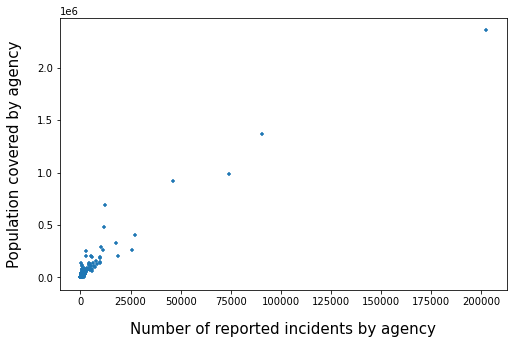

In [13]:
inc_counts = incident["AGENCY_ID"].value_counts() # counts the number of incidents associated with an agency ID
inc = pd.DataFrame(inc_counts.values, index = inc_counts.index, columns = ["NUMINC"])

# merge with other agency info
inc = pd.merge(left = inc, left_index = True, right = agencies, right_on = 'AGENCY_ID') 

fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(inc["NUMINC"], inc["POPULATION"], s = 10, marker = "+")
ax.set_xlabel("Number of reported incidents by agency", fontsize = 15, labelpad = 15)
ax.set_ylabel("Population covered by agency", fontsize = 15, labelpad = 15)
print("Number of reporting agencies: ", len(inc))

What are the outliers? 

In [14]:
inc.sort_values(axis = 0, by = "NUMINC", ascending = False)[0:10][["NUMINC", "NCIC_AGENCY_NAME", "NIBRS_START_DATE"]]

,NUMINC,NCIC_AGENCY_NAME,NIBRS_START_DATE
574,202581,HOUSTON POLICE DEPARTMENT,01-JUN-18
573,90375,DALLAS POLICE DEPARTMENT,01-MAR-18
512,73972,AUSTIN PD,01-JAN-19
489,46241,FORT WORTH PD,01-OCT-05
483,27243,ARLINGTON PD,01-FEB-16
347,25833,LUBBOCK PD,01-OCT-17
428,18568,AMARILLO PD,01-OCT-99
403,17930,CORPUS CHRISTI PD,01-MAY-19
179,12131,EL PASO PD,01-JUL-19
188,11828,FORT BEND CO SO RICHMOND,01-JUN-18


I see a pretty linear relationship between population covered by an agency and the number of incidents reported by that agency. What is the correlation coefficient between the two? What about correlation with the number of people employed by that agency, like the number of male/female officers or the number of total male/female employees (i.e. officers and civilians)?

In [15]:
print("Correlation matrix:")
inc[['NUMINC', 'POPULATION', 'MALE_OFFICER', 'FEMALE_OFFICER', 'PED.MALE_OFFICER+PED.MALE_CIVILIAN', 'PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER']].corr()

Correlation matrix:


,NUMINC,POPULATION,MALE_OFFICER,FEMALE_OFFICER,PED.MALE_OFFICER+PED.MALE_CIVILIAN,PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER
NUMINC,1.000000,0.958039,0.977120,0.966915,0.943237,0.901168
POPULATION,0.958039,1.000000,0.987091,0.959802,0.965904,0.935607
MALE_OFFICER,0.977120,0.987091,1.000000,0.982373,0.981042,0.949042
FEMALE_OFFICER,0.966915,0.959802,0.982373,1.000000,0.953602,0.926585
PED.MALE_OFFICER+PED.MALE_CIVILIAN,0.943237,0.965904,0.981042,0.953602,1.000000,0.986100
PED.FEMALE_CIVILIAN+PED.FEMALE_OFFICER,0.901168,0.935607,0.949042,0.926585,0.986100,1.000000


Slightly stronger correlations with number of male officers employed and number of female officers employed. 

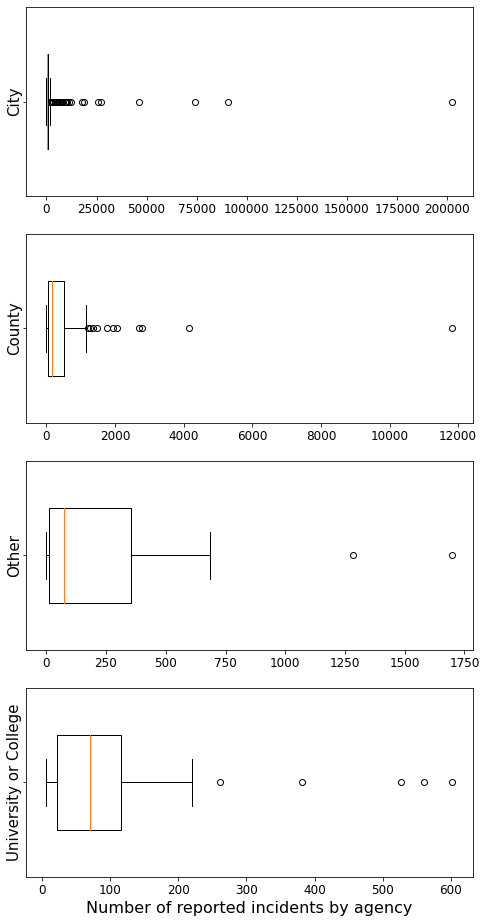

In [16]:
c = "AGENCY_TYPE_NAME"
n = len(inc[c].unique())
fig, axes = plt.subplots(n, figsize = (8, 4*n), sharex = False)
for i, each in enumerate(inc[c].unique()):
    axes[i].boxplot(inc.loc[inc[c]==each]["NUMINC"], vert = False, widths = 0.5)
    axes[i].set_ylabel(each, fontsize = 15)
    axes[i].tick_params(labelleft= False, labelsize = 12)
    
_ = axes[n-1].set_xlabel("Number of reported incidents by agency", fontsize = 16)

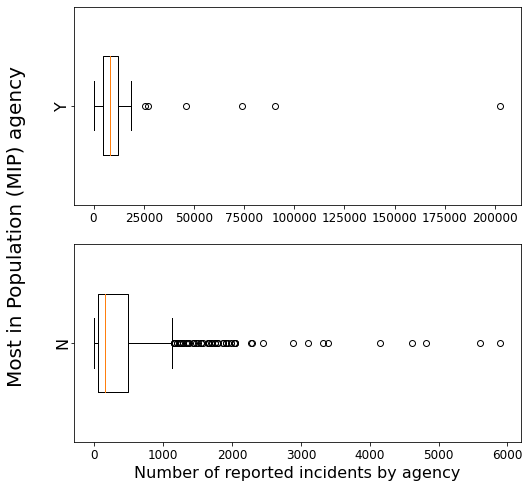

In [17]:
c = "MIP_FLAG" # indicates if an agency is a Most in Population agency (over 100,000)
n = len(inc[c].unique())
fig, axes = plt.subplots(n, figsize = (8, 4*n), sharex = False)
for i, each in enumerate(inc[c].unique()):
    axes[i].boxplot(inc.loc[inc[c]==each]["NUMINC"], vert = False, widths = 0.5)
    axes[i].set_ylabel(each, fontsize = 16)
    axes[i].tick_params(labelleft= False, labelsize = 12)
    
axes[n-1].set_xlabel("Number of reported incidents by agency", fontsize = 16)
_ = axes[0].text(-0.15,-0.9, "Most in Population (MIP) agency", transform = axes[0].transAxes, fontsize = 20, rotation = 90)

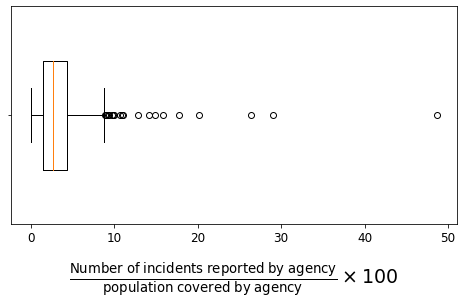

In [18]:
fig, ax = plt.subplots(figsize = (8,4))
ax.boxplot(inc.loc[inc['POPULATION']!=0]['NUMINC']/inc.loc[inc['POPULATION']!=0]['POPULATION']*100, vert = False, widths = 0.5)
ax.tick_params(labelleft = False, labelsize = 12)
_ = ax.set_xlabel(r"$\frac{\mathrm{Number\;of\;incidents\;reported\;by\;agency}}{\mathrm{population\;covered\;by \;agency}}\times 100$", fontsize = 19, labelpad = 15)

## Down to business

### 1. Select intimate partners from victim-offender relationship records

NIBRS_VICTIM_OFFENDER_REL.csv has columns `DATA_YEAR`,`VICTIM_ID`,`OFFENDER_ID`,`RELATIONSHIP_ID`,and `NIBRS_VICTIM_OFFENDER_ID`.

The values for `RELATIONSHIP_ID` are included in NIBRS_RELATIONSHIP.csv (see below)

In [19]:
#pandas.set_option('display.max_rows', None)
rel_types = pd.read_csv(folder+"NIBRS_RELATIONSHIP.csv")
rel_types

,RELATIONSHIP_ID,RELATIONSHIP_CODE,RELATIONSHIP_NAME,RELATIONSHIP_TYPE_ID
0,27,XR,Victim Was Ex-Relationship (Ex-Boyfriend/Girlf...,2
1,1,AQ,Victim Was Acquaintance,2
2,2,BE,Victim Was Babysittee,2
3,3,BG,Victim Was Boyfriend/Girlfriend,2
4,4,CF,Victim Was Child of Boyfriend or Girlfriend,2
5,5,CH,Victim Was Child,1
6,6,CS,Victim Was Common-Law Spouse,1
7,7,EE,Victim was Employee,2
8,8,ER,Victim was Employer,2
9,9,FR,Victim Was Friend,2


In [20]:
drel_types = dict(zip(rel_types['RELATIONSHIP_ID'].to_list(),rel_types['RELATIONSHIP_NAME'].to_list()))
drel_types[21]

'Victim Was Spouse'

**Question**: Should I include ex-boyfriends/ex-girlfriends and ex-spouses?

Note: Common-law marriage is a legal framework where a couple may be considered married without having formally registered their relation as a civil or religious marriage. 

From the NIBRS User Manual: 

*The agency should use the Victim Was Offender category when a participant in the incident was
a victim and offender in the incident, such as domestic disputes where both husband and wife
are charged with assault, double murders (two people kill each other), or barroom brawls
where many participants are arrested*

**Question**: Should I include cases where the victim was marked as both a victim and an offender? 


For now, I will include 
- victim was spouse (RELATIONSHIP_ID = 21)
- victim was boyfriend/girlfriend (RELATIONSHIP_ID = 3)
- victim was common-law spouse (RELATIONSHIP_ID = 6) 
- victim was offender (RELATIONSHIP_ID = 25)

I would like to include *victim was offender* cases because I do not want to exclude cases where the assault perpetrated by the victim failed to be identified as self-defense. Police response in nuanced situations is the very focus of this research project. However, I am not as interested in police response to incidents involving ex-relationships, though in general it would be another interesting factor to consider. 

-------------------

1. Select intimate partners from NIBRS_VICTIM_OFFENDER_REL.csv 
- victim was spouse (RELATIONSHIP_ID = 21)
- victim was boyfriend/girlfriend (RELATIONSHIP_ID = 3)
- victim was common-law spouse (RELATIONSHIP_ID = 6) 
- victim was offender (RELATIONSHIP_ID = 25)

In [21]:
vict = pd.read_csv(folder+"NIBRS_VICTIM_OFFENDER_REL.csv")
vict[:10]

,DATA_YEAR,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID
0,2019,126809311,131452179,24,39423392
1,2019,126809311,131452177,24,39428145
2,2019,126813479,131452178,24,39428146
3,2019,126805732,131452179,24,39423399
4,2019,126813481,131452177,24,39432538
5,2019,126805729,131452178,24,39428142
6,2019,126805729,131452177,24,39432536
7,2019,126809311,131452178,24,39423391
8,2019,126813479,131452177,24,39432537
9,2019,126813482,131455173,1,39432541


In [22]:
IPvict = vict.loc[(vict['RELATIONSHIP_ID']==21) | #spouse
                    (vict['RELATIONSHIP_ID']==3) | #boyfriend/girlfriend
                    (vict['RELATIONSHIP_ID']==6) | #common-law spouse
                    (vict['RELATIONSHIP_ID']==25)] #victim was offender

In [23]:
print("total no. of victim-offender relationship records in TX: ",len(vict))
print("no. of intimate partner relationship records (including mutual offenses) in TX: ", len(IPvict), "(%.2f percent)"%(len(IPvict)/len(vict)*100))

total no. of victim-offender relationship records in TX:  353070
no. of intimate partner relationship records (including mutual offenses) in TX:  78519 (22.24 percent)


In [24]:
IPvict_counts = IPvict.replace({'RELATIONSHIP_ID':drel_types}, inplace = False)['RELATIONSHIP_ID'].value_counts()
print(IPvict_counts)

Victim Was Boyfriend/Girlfriend    42109
Victim Was Spouse                  19824
Victim Was Offender                10113
Victim Was Common-Law Spouse        6473
Name: RELATIONSHIP_ID, dtype: int64


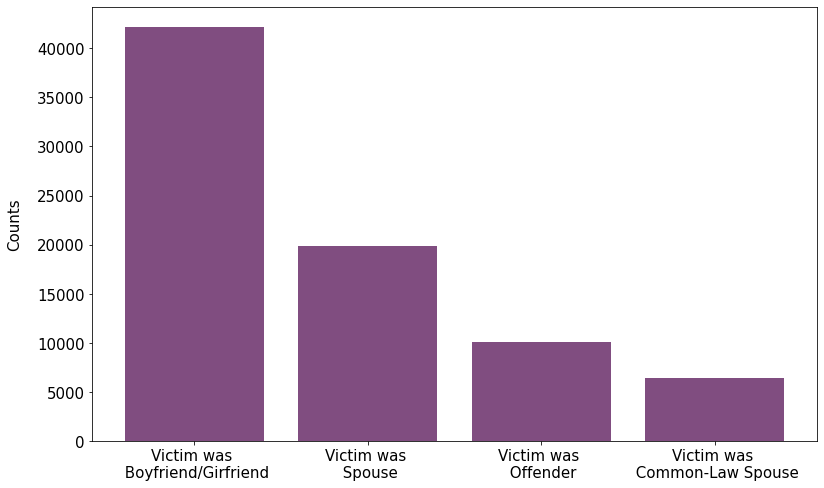

In [25]:
fig, ax  = plt.subplots(figsize = (13,8))
names = ["Victim was \n Boyfriend/Girfriend","Victim was \n Spouse", "Victim was \n Offender", "Victim was \n Common-Law Spouse" ]
ax.bar(names, IPvict_counts, color = (0.5,0.3,0.5))
ax.set_ylabel("Counts", fontsize = 15, labelpad = 15)
ax.tick_params('both', labelsize =15)

### 2. Connect victims to offenses
- NIBRS_VICTIM_OFFENDER_REL.csv contains `VICTIM_ID`
- NIBRS_VICTIM_OFFENSE contains both `VICTIM_ID` and `OFFENSE_ID`
- retain `OFFENDER_ID` from NIBRS_VICTIM_OFFENDER_REL.csv so I can get information on offender later 

I could first select offenses of interest and then join with the IP victim records, OR I could join the IP victim records with all offenses and see what types of offenses are listed. I will do the latter in order not to overlook any prominent offense category. 

In [26]:
offense_types = pd.read_csv(folder+"NIBRS_OFFENSE_TYPE.csv")
offense_types

,OFFENSE_TYPE_ID,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,CT_FLAG,HC_FLAG,HC_CODE,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP
0,58,23*,Not Specified,Property,N,Y,6.0,Larceny/Theft Offenses,A
1,1,09C,Justifiable Homicide,Person,N,N,NaN,Homicide Offenses,A
2,2,26A,False Pretenses/Swindle/Confidence Game,Property,Y,Y,NaN,Fraud Offenses,A
3,3,36B,Statutory Rape,Person,N,Y,NaN,"Sex Offenses, Non-forcible",A
4,4,11C,Sexual Assault With An Object,Person,N,Y,2.0,Sex Offenses,A
...,...,...,...,...,...,...,...,...,...
81,68,26H,Money Laundering,Society,N,N,NaN,Other Offenses,A
82,36,11A,Rape,Person,N,Y,2.0,Sex Offenses,A
83,50,23E,Theft From Coin-Operated Machine or Device,Property,N,N,NaN,Larceny/Theft Offenses,A
84,10,90D,Driving Under the Influence,Society,N,N,NaN,Driving Under the Influence,B


In [27]:
doffense_types = dict(zip(offense_types['OFFENSE_TYPE_ID'].to_list(),offense_types['OFFENSE_NAME'].to_list()))
doffense_types[2]

'False Pretenses/Swindle/Confidence Game'

See Table 1 in "HON 4355 - Project Update" for selection of UCR offense codes. It may need to be updated as appropriate, e.g. 

From [NIBRS Offense Definitions](https://ucr.fbi.gov/nibrs/2012/resources/nibrs-offense-definitions): 

**Family Offenses, Nonviolent** — Unlawful, nonviolent acts by a family member (or legal guardian)
that threaten the physical, mental, or economic well-being or morals of another family member
and that are not classifiable as other offenses, such as Assault, Incest, Statutory Rape, etc. 


In [28]:
NIBRS_victim_offense = pd.read_csv(folder+"NIBRS_VICTIM_OFFENSE.csv")

From the README: 

This table maps victims to offenses and should be used to get all
victims of a specific offense associated with an incident. Do not
simply assume that all offenses associated with an incident apply to all victims.

indicates that multiple victims may be tied to a specific offense, so in this case `OFFENSE_ID` is assumed to be the unique identifier and this suggests a *many-to-one* join. However, since it is possible a single victim in an incident may be a victim of multiple offenses, a *many-to-many* join might be appropriate. It depends on whether a single victim in an incident is assigned a unique `VICTIM_ID` for each offense perpetrated against them, which I can't find a clear answer for. 

Either way, I can use `how = 'right'` to ensure that each victim in my list of IP victim-offender relationships is matched with an offense. I tried it both ways and it doesn't matter whether `how = 'inner'` or `how = 'right'` is used. 

In [118]:
vict_offense = pd.merge(left = NIBRS_victim_offense, 
                        right = IPvict,
                        on = ['VICTIM_ID', 'DATA_YEAR'],
                        how = 'right',
)
vict_offense.columns

Index(['DATA_YEAR', 'VICTIM_ID', 'OFFENSE_ID', 'OFFENDER_ID',
       'RELATIONSHIP_ID', 'NIBRS_VICTIM_OFFENDER_ID'],
      dtype='object')

In [30]:
len(vict_offense)

82656

In [31]:
vict_offense[0:10]

,DATA_YEAR,VICTIM_ID,OFFENSE_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID
0,2019,126805771,140553023,131455216,3,39428163
1,2019,126805924,140562117,131449473,3,39428212
2,2019,126809471,140553332,131455349,21,39432589
3,2019,126806202,140562238,131452393,3,39428295
4,2019,126806200,140562239,131449756,3,39432605
5,2019,126806200,140562238,131449756,3,39432605
6,2019,126814368,140562667,131452880,21,39432744
7,2019,126807039,140554249,131460581,3,39428538
8,2019,126815029,140558826,131460781,3,39423819
9,2019,126807266,140554449,131460799,3,39428624


In [32]:
print("no. of intimate partner relationship records (including mutual offenses) in TX: ", len(IPvict))
print("no. of offense records associated with intimate partner relationship between victim-offender: ",len(vict_offense))


no. of intimate partner relationship records (including mutual offenses) in TX:  78519
no. of offense records associated with intimate partner relationship between victim-offender:  82656


This shows that the join is not one-to-one (i.e. more offense records that victim-offender relationship records). Let's explore:

In [33]:
print(len(vict_offense['VICTIM_ID'].unique()))
print(len(vict_offense['OFFENSE_ID'].unique()))
victids = pd.DataFrame(vict_offense[['VICTIM_ID']].value_counts(), columns = ['count'])

74567
73457


In [34]:
max(victids['count'])

6

(array([6.6892e+04, 7.3600e+03, 2.2000e+02, 9.3000e+01, 2.0000e+00]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

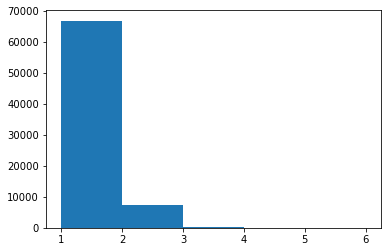

In [35]:
plt.hist(victids, bins = [1,2,3,4,5,6])

In [36]:
print(len(victids.loc[victids['count']>1]))

7675


In [37]:
# now look at unique instances of a victim_id and an offense_id
victoffids = pd.DataFrame(vict_offense[['VICTIM_ID', 'OFFENSE_ID']].value_counts(), columns = ['count'])

In [38]:
print(len(victoffids))
print(len(victoffids.loc[victoffids['count']>1]))

78612
4036


In [39]:
# now look at unique combination of victim_id, offense_id, and offender_id
allids = pd.DataFrame(vict_offense[['VICTIM_ID', 'OFFENSE_ID','OFFENDER_ID']].value_counts(), columns = ['count'])
len(allids)

82656

The vast majority of victims are tied to only one offense, but there are 7675 victim ids out of the 74567 victim ids that appear more than once. The most number of times that a victim id appears in the victim-offense dataset is six. The large majority of victim_ids that appear more than once appear twice (i.e. if victims are tied to multiple offenses it is most likely they are tied to two offenses).

I believe the rest of the discrepancy is covered by victims tied to more than one offender, since the number of unique combinations of victim, offender, and offense IDs is equal to the number of instances in the combined data set. Note `OFFENDER_ID` appears in NIBRS_VICTIM_OFFENDER_REL.csv but not in NIBRS_VICTIM_OFFENSE.csv. 

**Now let's connect this new dataframe to the NIBRS_OFFENSE.csv using** `OFFENDER_ID`

In [40]:
NIBRS_offense = pd.read_csv(folder+"NIBRS_offense.csv")
NIBRS_offense.columns

Index(['DATA_YEAR', 'OFFENSE_ID', 'INCIDENT_ID', 'OFFENSE_TYPE_ID',
       'ATTEMPT_COMPLETE_FLAG', 'LOCATION_ID', 'NUM_PREMISES_ENTERED',
       'METHOD_ENTRY_CODE'],
      dtype='object')

In [119]:
vict_offns = pd.merge(left = NIBRS_offense, 
                     right = vict_offense, 
                     on = ['DATA_YEAR','OFFENSE_ID'])
vict_offns.columns

Index(['DATA_YEAR', 'OFFENSE_ID', 'INCIDENT_ID', 'OFFENSE_TYPE_ID',
       'ATTEMPT_COMPLETE_FLAG', 'LOCATION_ID', 'NUM_PREMISES_ENTERED',
       'METHOD_ENTRY_CODE', 'VICTIM_ID', 'OFFENDER_ID', 'RELATIONSHIP_ID',
       'NIBRS_VICTIM_OFFENDER_ID'],
      dtype='object')

In [55]:
len(vict_offns)

82656

As expected, this merge just added additional information (columns) about the offense, including most notably `OFFENSE_TYPE_ID`. Now I can look at the types of offenses most common when the victim-offender relationship is one between intimate partners. 

In [56]:
offense_counts_total = vict_offns.replace({'OFFENSE_TYPE_ID':doffense_types}, inplace = False)['OFFENSE_TYPE_ID'].value_counts()
offense_counts = pd.DataFrame(offense_counts_total.to_list(), columns = ['Total'], index = offense_counts_total.index)

for relationship_id in [21,3,6,25]:
    tempdf = vict_offns.loc[vict_offns['RELATIONSHIP_ID']==relationship_id].replace({'OFFENSE_TYPE_ID':doffense_types}, inplace = False)['OFFENSE_TYPE_ID'].value_counts()
    tempdf = pd.DataFrame(tempdf.to_list(), columns = [drel_types[relationship_id]], index = tempdf.index)
    offense_counts = pd.merge(offense_counts, tempdf, left_index = True, right_index = True)

In [57]:
# counts of offenses
offense_counts

,Total,Victim Was Spouse,Victim Was Boyfriend/Girlfriend,Victim Was Common-Law Spouse,Victim Was Offender
Simple Assault,60261,15700,30623,5105,8833
Aggravated Assault,10187,2365,5993,928,901
Intimidation,6154,1434,4031,352,337
Destruction/Damage/Vandalism of Property,2226,218,1765,110,133
Rape,822,191,581,48,2
All Other Larceny,762,47,651,29,35
Kidnapping/Abduction,605,116,436,45,8
Robbery,422,24,367,14,17
Burglary/Breaking & Entering,415,38,355,18,4
Sodomy,97,12,75,6,4


In [58]:
offense_props_total = vict_offns.replace({'OFFENSE_TYPE_ID':doffense_types}, inplace = False)['OFFENSE_TYPE_ID'].value_counts(normalize = True)
offense_props = pd.DataFrame(offense_props_total.to_list(), columns = ['Total'], index = offense_props_total.index)

for relationship_id in [21,3,6,25]:
    tempdf = vict_offns.loc[vict_offns['RELATIONSHIP_ID']==relationship_id].replace({'OFFENSE_TYPE_ID':doffense_types}, inplace = False)['OFFENSE_TYPE_ID'].value_counts(normalize = True)
    tempdf = pd.DataFrame(tempdf.to_list(), columns = [drel_types[relationship_id]], index = tempdf.index)
    offense_props = pd.merge(offense_props, tempdf, left_index = True, right_index = True)

In [59]:
# types of offenses compared by proportion of all offenses (between intimate partners)
offense_props

,Total,Victim Was Spouse,Victim Was Boyfriend/Girlfriend,Victim Was Common-Law Spouse,Victim Was Offender
Simple Assault,0.729058,0.776152,0.673907,0.762965,0.857906
Aggravated Assault,0.123246,0.116917,0.131885,0.138694,0.087510
Intimidation,0.074453,0.070892,0.088708,0.052608,0.032731
Destruction/Damage/Vandalism of Property,0.026931,0.010777,0.038842,0.016440,0.012918
Rape,0.009945,0.009442,0.012786,0.007174,0.000194
All Other Larceny,0.009219,0.002324,0.014326,0.004334,0.003399
Kidnapping/Abduction,0.007319,0.005735,0.009595,0.006725,0.000777
Robbery,0.005105,0.001186,0.008076,0.002092,0.001651
Burglary/Breaking & Entering,0.005021,0.001879,0.007812,0.002690,0.000389
Sodomy,0.001174,0.000593,0.001650,0.000897,0.000389


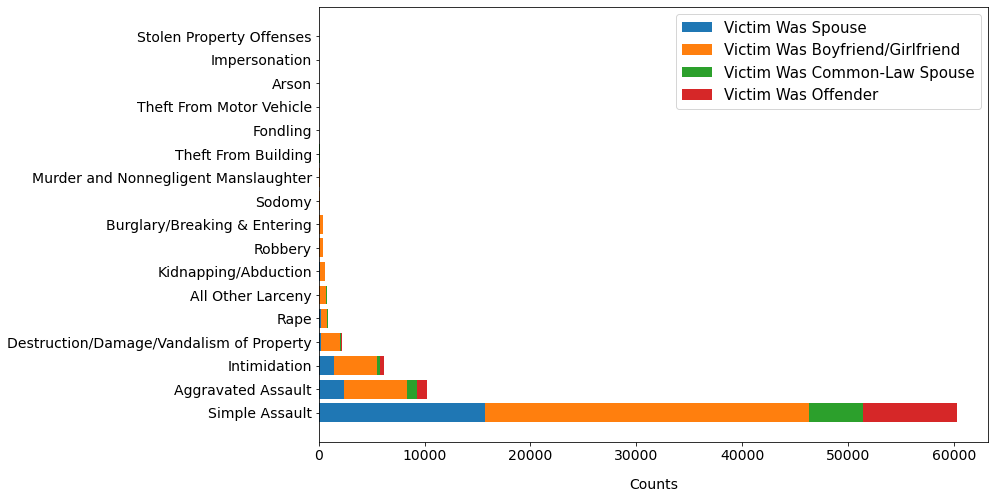

In [60]:
fig, ax = plt.subplots(figsize = (12,8))
left = 0
for relationship_id in [21,3,6,25]:
    relationship_type = drel_types[relationship_id]
    ax.barh(offense_counts.index.to_list(), offense_counts[relationship_type], left = left, label = relationship_type)
    left+=offense_counts[relationship_type]
ax.legend(fontsize = 15)
ax.set_xlabel("Counts", fontsize = 14, labelpad = 15)
ax.tick_params('both', labelsize =14)

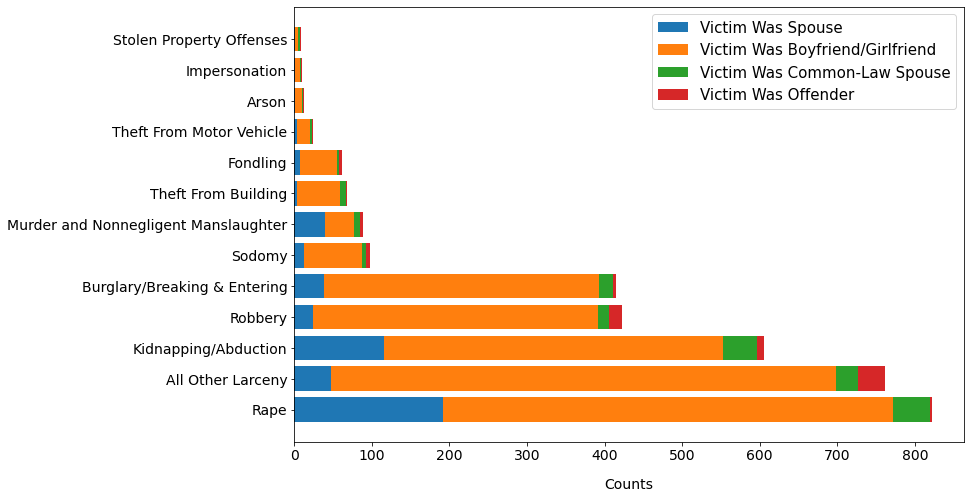

In [61]:
fig, ax = plt.subplots(figsize = (12,8))
left = 0
for relationship_id in [21,3,6,25]:
    relationship_type = drel_types[relationship_id]
    ax.barh(offense_counts.index.to_list()[4:], offense_counts[relationship_type][4:], left = left, label = relationship_type)
    left+=offense_counts[relationship_type][4:]
ax.legend(fontsize = 15)
ax.set_xlabel("Counts", fontsize = 14, labelpad = 15)
ax.tick_params('both', labelsize =14)

Interesting to note that the only offense where victims were more commonly spouses than boyfriends/girlfriends is murder and nonnegligent manslaughter (39 incidents where victim was spouse versus 38 where victim was boyfriend/girlfriend). 

Now the key is to decide which of these too include in my selection of DV offenses. Offenses like destruction/damamge/vandalism certainly occur in DV relationships (one of the quotes I read from a survivor's story included the offender threatening to burn the survivor's house down), but is that offense alone enough to categorize the incident as such?

From [NIBRS Offense Definitions](https://ucr.fbi.gov/nibrs/2012/resources/nibrs-offense-definitions): 

**Burglary/Breaking and Entering** - The unlawful entry into a building or other structure with the
intent to commit a felony or a theft. 

**Destruction/Damage/Vandalism of Property—(Except Arson)**  - To willfully or maliciously
destroy, damage, deface, or otherwise injure real or personal property without the consent of
the owner or the person having custody or control of it. 

**Theft From Building** - A theft from within a building which is either open to the general
public or where the offender has legal access. 

*Larceny/Theft Offenses* - The unlawful taking, carrying, leading, or riding away of property
from the possession, or constructive possession, of another person. 

**All Other Larceny** - All thefts which do not fit any of the definitions of the specific
subcategories of Larceny/Theft listed: pocket-picking, purse-snatching, shoplifting, theft from building, theft from coin-operated machine, theft from motor vehicle (except theft of motor vehicle parts of accessories), theft of motor vehicle parts or accessories)

**Robbery**  - The taking, or attempting to take, anything of value under confrontational
circumstances from the control, custody, or care of another person by force or threat of force
or violence and/or by putting the victim in fear of immediate harm. 

**Intimidation** - To unlawfully place another person in reasonable fear of bodily harm
through the use of threatening words and/or other conduct, but without displaying a
weapon or subjecting the victim to actual physical attack.

**Aggravated Assault** — An unlawful attack by one person upon another wherein the offender
uses a weapon or displays it in a threatening manner, or the victim suffers obvious severe or
aggravated bodily injury involving apparent broken bones, loss of teeth, possible internal
injury, severe laceration, or loss of consciousness. This also includes assault with disease (as
in cases when the offender is aware that he/she is infected with a deadly disease and
deliberately attempts to inflict the disease by biting, spitting, etc.).

**Simple Assault** — An unlawful physical attack by one person upon another where neither the
offender displays a weapon, nor the victim suffers obvious severe or aggravated bodily
injury involving apparent broken bones, loss of teeth, possible internal injury, severe
laceration, or loss of consciousness

## Add Victim and Offender information (e.g., age, sex, race)

In [120]:
NIBRS_victim = pd.read_csv(folder+"NIBRS_victim.csv")
NIBRS_victim.columns

Index(['DATA_YEAR', 'VICTIM_ID', 'INCIDENT_ID', 'VICTIM_SEQ_NUM',
       'VICTIM_TYPE_ID', 'ASSIGNMENT_TYPE_ID', 'ACTIVITY_TYPE_ID',
       'OUTSIDE_AGENCY_ID', 'AGE_ID', 'AGE_NUM', 'SEX_CODE', 'RACE_ID',
       'ETHNICITY_ID', 'RESIDENT_STATUS_CODE', 'AGE_RANGE_LOW_NUM',
       'AGE_RANGE_HIGH_NUM'],
      dtype='object')

Something different from the ICPSR distribution is that age is given via two variables as a range instead of being given as a single value. I don't expect this to be an issue since I'm dealing with intimate partner relationships. Here's what `AGE_ID` corresponds to:

In [165]:
pd.read_csv(folder + "NIBRS_AGE.csv")

,AGE_ID,AGE_CODE,AGE_NAME
0,1,NN,Under 24 Hours
1,2,NB,1-6 Days Old
2,3,BB,7-364 Days Old
3,4,00,Unknown
4,5,AG,Age in Years
5,6,99,Over 98 Years Old
6,0,NS,Not Specified


If the age is known , it's given by `AGE_RANGE_LOW_NUM`. If `AGE_ID` is anything other than 5, `AGE_RANGE_LOW_NUM` and `AGE_RANGE_HIGH_NUM` are both NaN. If `AGE_ID` is 5, `AGE_RANGE_HIGH_NUM` can be either 0 (if exact age is known) or greater than `AGE_RANGE_LOW_NUM` (thus giving an age range). 

In [175]:
NIBRS_victim[["AGE_ID", 'AGE_RANGE_LOW_NUM', 'AGE_RANGE_HIGH_NUM']][0:10]

,AGE_ID,AGE_RANGE_LOW_NUM,AGE_RANGE_HIGH_NUM
0,5.0,35.0,0.0
1,5.0,25.0,0.0
2,5.0,57.0,0.0
3,5.0,34.0,0.0
4,5.0,37.0,0.0
5,5.0,47.0,0.0
6,5.0,63.0,0.0
7,NaN,NaN,NaN
8,5.0,79.0,0.0
9,5.0,27.0,0.0


In [195]:
NIBRS_victim[["AGE_ID", 'AGE_RANGE_LOW_NUM', 'AGE_RANGE_HIGH_NUM']].loc[NIBRS_victim['AGE_RANGE_HIGH_NUM']>0][0:10]

,AGE_ID,AGE_RANGE_LOW_NUM,AGE_RANGE_HIGH_NUM
375,5.0,18.0,99.0
1132,5.0,60.0,65.0
1454,5.0,12.0,65.0
2889,5.0,40.0,49.0
2924,5.0,15.0,16.0
3257,5.0,1.0,17.0
3917,5.0,17.0,99.0
4060,5.0,21.0,99.0
4268,5.0,10.0,20.0
4445,5.0,67.0,70.0


In [196]:
VO1 = pd.merge(left = vict_offns,
              right = NIBRS_victim, 
              on = ['DATA_YEAR', 'VICTIM_ID', 'INCIDENT_ID'])
print("in previous dataset, n = ", len(vict_offns))
print("in new dataset, n = ", len(VO1))
VO1.columns

in previous dataset, n =  82656
in new dataset, n =  82656


Index(['DATA_YEAR', 'OFFENSE_ID', 'INCIDENT_ID', 'OFFENSE_TYPE_ID',
       'ATTEMPT_COMPLETE_FLAG', 'LOCATION_ID', 'NUM_PREMISES_ENTERED',
       'METHOD_ENTRY_CODE', 'VICTIM_ID', 'OFFENDER_ID', 'RELATIONSHIP_ID',
       'NIBRS_VICTIM_OFFENDER_ID', 'VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID',
       'ASSIGNMENT_TYPE_ID', 'ACTIVITY_TYPE_ID', 'OUTSIDE_AGENCY_ID', 'AGE_ID',
       'AGE_NUM', 'SEX_CODE', 'RACE_ID', 'ETHNICITY_ID',
       'RESIDENT_STATUS_CODE', 'AGE_RANGE_LOW_NUM', 'AGE_RANGE_HIGH_NUM'],
      dtype='object')

In [123]:
NIBRS_offender = pd.read_csv(folder + "NIBRS_offender.csv")
NIBRS_offender.columns

Index(['DATA_YEAR', 'OFFENDER_ID', 'INCIDENT_ID', 'OFFENDER_SEQ_NUM', 'AGE_ID',
       'AGE_NUM', 'SEX_CODE', 'RACE_ID', 'ETHNICITY_ID', 'AGE_RANGE_LOW_NUM',
       'AGE_RANGE_HIGH_NUM'],
      dtype='object')

In [146]:
# for each in NIBRS_offender.columns.to_list():
#     if each in NIBRS_victim.columns.to_list():
#         print(each)

The same variable names `AGE_ID`, `AGE_NUM`, `SEX_CODE`, `RACE_ID`, `ETHNICITY_ID`, `AGE_RANGE_LOW_NUM`, `AGE_RANGE_HIGH_NUM` are used in both NIBRS_victim.csv and NIBRS_offender.csv

So I'll have to rename the variables before merging. 

In [149]:
vmap = {}
for each in ['AGE_ID', 'AGE_NUM', 'SEX_CODE', 'RACE_ID', 'ETHNICITY_ID', 'AGE_RANGE_LOW_NUM', 'AGE_RANGE_HIGH_NUM']:
    vmap[each] = 'VICTIM_'+each


NIBRS_victim2 = NIBRS_victim.rename(columns = vmap)
NIBRS_victim2.columns

Index(['DATA_YEAR', 'VICTIM_ID', 'INCIDENT_ID', 'VICTIM_SEQ_NUM',
       'VICTIM_TYPE_ID', 'ASSIGNMENT_TYPE_ID', 'ACTIVITY_TYPE_ID',
       'OUTSIDE_AGENCY_ID', 'VICTIM_AGE_ID', 'VICTIM_AGE_NUM',
       'VICTIM_SEX_CODE', 'VICTIM_RACE_ID', 'VICTIM_ETHNICITY_ID',
       'RESIDENT_STATUS_CODE', 'VICTIM_AGE_RANGE_LOW_NUM',
       'VICTIM_AGE_RANGE_HIGH_NUM'],
      dtype='object')

In [151]:
# redo victim info merge with new column names
VO1 = pd.merge(left = vict_offns,
              right = NIBRS_victim2, 
              on = ['DATA_YEAR', 'VICTIM_ID', 'INCIDENT_ID'])
print("in previous dataset, n = ", len(vict_offns))
print("in new dataset, n = ", len(VO1))
VO1.columns

in previous dataset, n =  82656
in new dataset, n =  82656


Index(['DATA_YEAR', 'OFFENSE_ID', 'INCIDENT_ID', 'OFFENSE_TYPE_ID',
       'ATTEMPT_COMPLETE_FLAG', 'LOCATION_ID', 'NUM_PREMISES_ENTERED',
       'METHOD_ENTRY_CODE', 'VICTIM_ID', 'OFFENDER_ID', 'RELATIONSHIP_ID',
       'NIBRS_VICTIM_OFFENDER_ID', 'VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID',
       'ASSIGNMENT_TYPE_ID', 'ACTIVITY_TYPE_ID', 'OUTSIDE_AGENCY_ID',
       'VICTIM_AGE_ID', 'VICTIM_AGE_NUM', 'VICTIM_SEX_CODE', 'VICTIM_RACE_ID',
       'VICTIM_ETHNICITY_ID', 'RESIDENT_STATUS_CODE',
       'VICTIM_AGE_RANGE_LOW_NUM', 'VICTIM_AGE_RANGE_HIGH_NUM'],
      dtype='object')

In [152]:
omap = {}
for each in ['AGE_ID', 'AGE_NUM', 'SEX_CODE', 'RACE_ID', 'ETHNICITY_ID', 'AGE_RANGE_LOW_NUM', 'AGE_RANGE_HIGH_NUM']:
    omap[each] = 'OFFENDER_'+each
    
NIBRS_offender2 = NIBRS_offender.rename(columns = omap)
NIBRS_offender2.columns


Index(['DATA_YEAR', 'OFFENDER_ID', 'INCIDENT_ID', 'OFFENDER_SEQ_NUM',
       'OFFENDER_AGE_ID', 'OFFENDER_AGE_NUM', 'OFFENDER_SEX_CODE',
       'OFFENDER_RACE_ID', 'OFFENDER_ETHNICITY_ID',
       'OFFENDER_AGE_RANGE_LOW_NUM', 'OFFENDER_AGE_RANGE_HIGH_NUM'],
      dtype='object')

In [153]:
VO2 = pd.merge(left = VO1, 
              right = NIBRS_offender2, 
              on = ['DATA_YEAR', 'OFFENDER_ID', 'INCIDENT_ID'])
print("in new dataset, n = ",len(VO2))
VO2.columns

in new dataset, n =  82656


Index(['DATA_YEAR', 'OFFENSE_ID', 'INCIDENT_ID', 'OFFENSE_TYPE_ID',
       'ATTEMPT_COMPLETE_FLAG', 'LOCATION_ID', 'NUM_PREMISES_ENTERED',
       'METHOD_ENTRY_CODE', 'VICTIM_ID', 'OFFENDER_ID', 'RELATIONSHIP_ID',
       'NIBRS_VICTIM_OFFENDER_ID', 'VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID',
       'ASSIGNMENT_TYPE_ID', 'ACTIVITY_TYPE_ID', 'OUTSIDE_AGENCY_ID',
       'VICTIM_AGE_ID', 'VICTIM_AGE_NUM', 'VICTIM_SEX_CODE', 'VICTIM_RACE_ID',
       'VICTIM_ETHNICITY_ID', 'RESIDENT_STATUS_CODE',
       'VICTIM_AGE_RANGE_LOW_NUM', 'VICTIM_AGE_RANGE_HIGH_NUM',
       'OFFENDER_SEQ_NUM', 'OFFENDER_AGE_ID', 'OFFENDER_AGE_NUM',
       'OFFENDER_SEX_CODE', 'OFFENDER_RACE_ID', 'OFFENDER_ETHNICITY_ID',
       'OFFENDER_AGE_RANGE_LOW_NUM', 'OFFENDER_AGE_RANGE_HIGH_NUM'],
      dtype='object')

Just to make things a bit easier, I will create variables `OFFENDER_AGE` and `VICTIM_AGE` for cases where the exact age is known. 

In [204]:
VO2['OFFENDER_AGE'] = np.where((VO2['OFFENDER_AGE_ID']==5)&(VO2['OFFENDER_AGE_RANGE_HIGH_NUM']==0), 
                               VO2['OFFENDER_AGE_RANGE_LOW_NUM'], 
                              -99)

VO2['VICTIM_AGE'] = np.where((VO2['VICTIM_AGE_ID']==5)&(VO2['VICTIM_AGE_RANGE_HIGH_NUM']==0), 
                               VO2['VICTIM_AGE_RANGE_LOW_NUM'], 
                              -99)

## Merging with incident data

The arrestee data is connected with `INCIDENT_ID`, so in order to get information on whether or not an arrest occurred, I must merge the offense data with incident data. 

In [205]:
## double check I didn't miss any variables present in both VO2 and NIBRS_incident
# for each in VO2.columns.to_list():
#     if each in NIBRS_incident.columns.to_list():
#         print(each)

In [206]:
# IVO = incident, victim, offender
IVO = pd.merge(left = NIBRS_incident, 
        right = VO2, 
        on = ['DATA_YEAR', 'INCIDENT_ID'],
        how = "inner") # how = 'right' produces the same result
print(len(vict_offns))
print(len(IVO))
IVO.columns

82656
82656


Index(['DATA_YEAR', 'AGENCY_ID', 'INCIDENT_ID', 'NIBRS_MONTH_ID',
       'CARGO_THEFT_FLAG', 'SUBMISSION_DATE', 'INCIDENT_DATE',
       'REPORT_DATE_FLAG', 'INCIDENT_HOUR', 'CLEARED_EXCEPT_ID',
       'CLEARED_EXCEPT_DATE', 'INCIDENT_STATUS', 'DATA_HOME', 'ORIG_FORMAT',
       'DID', 'OFFENSE_ID', 'OFFENSE_TYPE_ID', 'ATTEMPT_COMPLETE_FLAG',
       'LOCATION_ID', 'NUM_PREMISES_ENTERED', 'METHOD_ENTRY_CODE', 'VICTIM_ID',
       'OFFENDER_ID', 'RELATIONSHIP_ID', 'NIBRS_VICTIM_OFFENDER_ID',
       'VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID', 'ASSIGNMENT_TYPE_ID',
       'ACTIVITY_TYPE_ID', 'OUTSIDE_AGENCY_ID', 'VICTIM_AGE_ID',
       'VICTIM_AGE_NUM', 'VICTIM_SEX_CODE', 'VICTIM_RACE_ID',
       'VICTIM_ETHNICITY_ID', 'RESIDENT_STATUS_CODE',
       'VICTIM_AGE_RANGE_LOW_NUM', 'VICTIM_AGE_RANGE_HIGH_NUM',
       'OFFENDER_SEQ_NUM', 'OFFENDER_AGE_ID', 'OFFENDER_AGE_NUM',
       'OFFENDER_SEX_CODE', 'OFFENDER_RACE_ID', 'OFFENDER_ETHNICITY_ID',
       'OFFENDER_AGE_RANGE_LOW_NUM', 'OFFENDER_AGE_RANGE_HI

Now I have to figure out how to address this:

In [207]:
print("number of rows in dataset: ",len(IVO))
print("number of unique incidents in dataset: ",len(IVO['INCIDENT_ID'].unique()))

number of rows in dataset:  82656
number of unique incidents in dataset:  69047


In [208]:
# find distribution of no. of appearances of incident_id in the data
IVO['INCIDENT_ID'].value_counts().value_counts()

1    60103
2     6481
4     1851
3      495
6       57
5       38
8       14
7        7
9        1
Name: INCIDENT_ID, dtype: int64

The majority of incidents only appear once, but some appear multiple times (i.e. due to multiple victims or offenses). I'll create a variable (`INC_APPEARS`) to indicate how many times the incident ID is repeated in the current dataset and then explore. 

In [209]:
nappears = IVO['INCIDENT_ID'].value_counts()
#IVO.set_index('INCIDENT_ID', inplace = True)
temp = pd.DataFrame(nappears.values, index = nappears.index, columns = ['INC_APPEARS'])
IVO = pd.merge(left = IVO, right = temp, right_index = True, left_on = 'INCIDENT_ID', how = 'inner')
print(len(IVO))

82656


Let's look at some examples where `INC_APPEARS` $>1$

In [210]:
IVO.loc[IVO['INC_APPEARS']>1][0:10]

,DATA_YEAR,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,INCIDENT_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,...,OFFENDER_AGE_ID,OFFENDER_AGE_NUM,OFFENDER_SEX_CODE,OFFENDER_RACE_ID,OFFENDER_ETHNICITY_ID,OFFENDER_AGE_RANGE_LOW_NUM,OFFENDER_AGE_RANGE_HIGH_NUM,OFFENDER_AGE,VICTIM_AGE,INC_APPEARS
6,2019,19658,111286451,9002621,NaN,22-MAY-19,06-MAR-19,NaN,16.0,6,...,5.0,22.0,F,1.0,1.0,22.0,0.0,22.0,22.0,3
7,2019,19658,111286451,9002621,NaN,22-MAY-19,06-MAR-19,NaN,16.0,6,...,5.0,22.0,F,1.0,1.0,22.0,0.0,22.0,22.0,3
8,2019,19658,111286451,9002621,NaN,22-MAY-19,06-MAR-19,NaN,16.0,6,...,5.0,32.0,M,1.0,1.0,32.0,0.0,32.0,32.0,3
11,2019,19658,112357962,9085073,NaN,19-JUN-19,26-APR-19,NaN,9.0,6,...,5.0,17.0,M,1.0,1.0,17.0,0.0,17.0,17.0,2
12,2019,19658,112357962,9085073,NaN,19-JUN-19,26-APR-19,NaN,9.0,6,...,5.0,17.0,M,1.0,1.0,17.0,0.0,17.0,17.0,2
14,2019,19658,117609365,10667772,NaN,13-NOV-19,10-SEP-19,NaN,21.0,6,...,5.0,42.0,M,1.0,1.0,42.0,0.0,42.0,42.0,2
15,2019,19658,117609365,10667772,NaN,13-NOV-19,10-SEP-19,NaN,21.0,6,...,5.0,45.0,M,1.0,1.0,45.0,0.0,45.0,45.0,2
16,2019,19658,117612869,10667772,NaN,13-NOV-19,17-SEP-19,NaN,20.0,6,...,5.0,18.0,M,1.0,1.0,18.0,0.0,18.0,18.0,2
17,2019,19658,117612869,10667772,NaN,13-NOV-19,17-SEP-19,NaN,20.0,6,...,5.0,18.0,M,1.0,1.0,18.0,0.0,18.0,18.0,2
40,2019,19658,112357960,9085073,N,19-JUN-19,20-APR-19,NaN,19.0,6,...,5.0,31.0,M,1.0,1.0,31.0,0.0,31.0,33.0,2


So the first three rows are from the same incident

In [233]:
# as a quick check that these rows are indeed all incidents in the dataset with this incident ID 
IVO.loc[IVO['INCIDENT_ID']==111286451]

,DATA_YEAR,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,INCIDENT_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,...,OFFENDER_AGE_ID,OFFENDER_AGE_NUM,OFFENDER_SEX_CODE,OFFENDER_RACE_ID,OFFENDER_ETHNICITY_ID,OFFENDER_AGE_RANGE_LOW_NUM,OFFENDER_AGE_RANGE_HIGH_NUM,OFFENDER_AGE,VICTIM_AGE,INC_APPEARS
6,2019,19658,111286451,9002621,NaN,22-MAY-19,06-MAR-19,NaN,16.0,6,...,5.0,22.0,F,1.0,1.0,22.0,0.0,22.0,22.0,3
7,2019,19658,111286451,9002621,NaN,22-MAY-19,06-MAR-19,NaN,16.0,6,...,5.0,22.0,F,1.0,1.0,22.0,0.0,22.0,22.0,3
8,2019,19658,111286451,9002621,NaN,22-MAY-19,06-MAR-19,NaN,16.0,6,...,5.0,32.0,M,1.0,1.0,32.0,0.0,32.0,32.0,3


#### Example 1

In [225]:
colselect = ['INCIDENT_ID', 'OFFENSE_TYPE_ID', 'LOCATION_ID', 'VICTIM_ID', 'OFFENDER_ID', 
             'RELATIONSHIP_ID', 'NIBRS_VICTIM_OFFENDER_ID', 'VICTIM_AGE', 'VICTIM_SEX_CODE', 
            'OFFENDER_AGE', 'OFFENDER_SEX_CODE', 'INC_APPEARS']
location_types = pd.read_csv(folder+"NIBRS_LOCATION_TYPE.csv")
dlocation_type = dict(zip(location_types["LOCATION_ID"], location_types['LOCATION_NAME']))
IVO[colselect].loc[IVO['INC_APPEARS']>1][0:3].replace({'RELATIONSHIP_ID':drel_types}, inplace = False)\
                                            .replace({'OFFENSE_TYPE_ID':doffense_types})\
                                            .replace({'LOCATION_ID':dlocation_type})


,INCIDENT_ID,OFFENSE_TYPE_ID,LOCATION_ID,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID,VICTIM_AGE,VICTIM_SEX_CODE,OFFENDER_AGE,OFFENDER_SEX_CODE,INC_APPEARS
6,111286451,Simple Assault,Residence/Home,122650826,126082413,Victim Was Offender,37741013,22.0,F,22.0,F,3
7,111286451,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk,122650826,126082413,Victim Was Offender,37741013,22.0,F,22.0,F,3
8,111286451,Simple Assault,Residence/Home,122650822,126082414,Victim Was Offender,37736682,32.0,M,32.0,M,3


Because each relationship is listed as victim was offender, we don't know the relationship between the two people involved. I'll find another example. 

In [231]:
# IVO[colselect].loc[IVO['INC_APPEARS']>1].sample(10)

#### Example 2

In [230]:
colselect = colselect + ['ATTEMPT_COMPLETE_FLAG']
IVO[colselect].loc[IVO['INCIDENT_ID']==112935881].replace({'RELATIONSHIP_ID':drel_types}, inplace = False)\
                                            .replace({'OFFENSE_TYPE_ID':doffense_types})\
                                            .replace({'LOCATION_ID':dlocation_type})

,INCIDENT_ID,OFFENSE_TYPE_ID,LOCATION_ID,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID,VICTIM_AGE,VICTIM_SEX_CODE,OFFENDER_AGE,OFFENDER_SEX_CODE,INC_APPEARS,ATTEMPT_COMPLETE_FLAG
66073,112935881,Simple Assault,Grocery/Supermarket,124512128,128011053,Victim Was Boyfriend/Girlfriend,38500449,29.0,M,19.0,F,4,C
66074,112935881,Simple Assault,Grocery/Supermarket,124512129,128011053,Victim Was Offender,38500451,19.0,F,19.0,F,4,C
66075,112935881,Simple Assault,Grocery/Supermarket,124512128,128002674,Victim Was Offender,38500448,29.0,M,29.0,M,4,C
66076,112935881,Simple Assault,Grocery/Supermarket,124512129,128002674,Victim Was Boyfriend/Girlfriend,38500450,19.0,F,29.0,M,4,C


This is a better example of how I saw "Victim Was Offender" used. Both a female (age 19) and a male (age 29) committed simple assault against the other at a grocery/supermarket. Here I'm using "male"/ "female" to refer to person's sex, which may or may not be the same as that person's gender. 

#### Example 3

In [241]:
IVO[colselect].loc[IVO['INC_APPEARS']>1].sample(1)['INCIDENT_ID'].values[0]

111243736

In [235]:
IVO[colselect].loc[IVO['INCIDENT_ID']==116762327].replace({'RELATIONSHIP_ID':drel_types}, inplace = False)\
                                            .replace({'OFFENSE_TYPE_ID':doffense_types})\
                                            .replace({'LOCATION_ID':dlocation_type})

,INCIDENT_ID,OFFENSE_TYPE_ID,LOCATION_ID,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID,VICTIM_AGE,VICTIM_SEX_CODE,OFFENDER_AGE,OFFENDER_SEX_CODE,INC_APPEARS,ATTEMPT_COMPLETE_FLAG
80353,116762327,Simple Assault,Hotel/Motel/Etc.,127910690,132706976,Victim Was Offender,39905965,50.0,M,50.0,M,4,C
80354,116762327,Simple Assault,Hotel/Motel/Etc.,127910687,132706976,Victim Was Spouse,39905963,51.0,F,50.0,M,4,C
80355,116762327,Simple Assault,Hotel/Motel/Etc.,127910690,132706977,Victim Was Spouse,39905966,50.0,M,51.0,F,4,C
80356,116762327,Simple Assault,Hotel/Motel/Etc.,127910687,132706977,Victim Was Offender,39905964,51.0,F,51.0,F,4,C


Here is another example similar to that above. Both husband and wife are reported as committing simple assault against the other, with the incident taking place in a hotel/motel/etc. 

#### Example 4

In [242]:
incnum = IVO[colselect].loc[IVO['INC_APPEARS']>1].sample(1, random_state = 2)['INCIDENT_ID'].values[0]
IVO[colselect].loc[IVO['INCIDENT_ID']==incnum].replace({'RELATIONSHIP_ID':drel_types}, inplace = False)\
                                            .replace({'OFFENSE_TYPE_ID':doffense_types})\
                                            .replace({'LOCATION_ID':dlocation_type})

,INCIDENT_ID,OFFENSE_TYPE_ID,LOCATION_ID,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID,VICTIM_AGE,VICTIM_SEX_CODE,OFFENDER_AGE,OFFENDER_SEX_CODE,INC_APPEARS,ATTEMPT_COMPLETE_FLAG
23350,116790257,Destruction/Damage/Vandalism of Property,Parking/Drop Lot/Garage,127946554,132740869,Victim Was Boyfriend/Girlfriend,39927730,24.0,F,28.0,M,2,C
23351,116790257,Aggravated Assault,Parking/Drop Lot/Garage,127946554,132740869,Victim Was Boyfriend/Girlfriend,39927730,24.0,F,28.0,M,2,C


Here is an example with a single victim and two offenses. The male offender (age 28) who is the boyfriend of the female victim (age 24), committed aggravated assault and destruction/damage/vandalism of property in a parking/drop lot/garage. 

#### Example 5

In [261]:
incnum = IVO[colselect].loc[IVO['INC_APPEARS']==6].sample(1, random_state = 25)['INCIDENT_ID'].values[0]
IVO[colselect].loc[IVO['INCIDENT_ID']==incnum].replace({'RELATIONSHIP_ID':drel_types}, inplace = False)\
                                            .replace({'OFFENSE_TYPE_ID':doffense_types})\
                                            .replace({'LOCATION_ID':dlocation_type})

,INCIDENT_ID,OFFENSE_TYPE_ID,LOCATION_ID,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID,VICTIM_AGE,VICTIM_SEX_CODE,OFFENDER_AGE,OFFENDER_SEX_CODE,INC_APPEARS,ATTEMPT_COMPLETE_FLAG
80319,116757663,Destruction/Damage/Vandalism of Property,Residence/Home,127906716,132707044,Victim Was Boyfriend/Girlfriend,39911754,24.0,F,30.0,M,6,C
80320,116757663,Simple Assault,Residence/Home,127906716,132707044,Victim Was Boyfriend/Girlfriend,39911754,24.0,F,30.0,M,6,C
80321,116757663,Simple Assault,Residence/Home,127910759,132707044,Victim Was Boyfriend/Girlfriend,39906000,30.0,M,30.0,M,6,C
80322,116757663,Destruction/Damage/Vandalism of Property,Residence/Home,127906716,132703169,Victim Was Boyfriend/Girlfriend,39911753,24.0,F,24.0,F,6,C
80323,116757663,Simple Assault,Residence/Home,127906716,132703169,Victim Was Boyfriend/Girlfriend,39911753,24.0,F,24.0,F,6,C
80324,116757663,Simple Assault,Residence/Home,127910759,132703169,Victim Was Boyfriend/Girlfriend,39911755,30.0,M,24.0,F,6,C


This one seems like it may be a case of 'Victim was Offender' but where that relationship_id was not used properly. What this reads as technically is simple assault and destruction/damge/vandalism of property was committed against female A (24 yrs) by both female A's boyfriend (male A, 30 yrs) and female A's girlfriend (female B, 24 yrs). Additionally, female B committed simple assault against a boyfriend (male B, 30 yrs) and male A committed simple assualt against a boyfriend (male B). It is of course possible this rectangle of relationships was the case, but it seems suspicious that the necessary two females involved are both 24 years old and two males involved are both 30 years old. 

#### Example 6

In [262]:
incnum = IVO[colselect].loc[IVO['INC_APPEARS']==6].sample(1, random_state = 1)['INCIDENT_ID'].values[0]
IVO[colselect].loc[IVO['INCIDENT_ID']==incnum].replace({'RELATIONSHIP_ID':drel_types}, inplace = False)\
                                            .replace({'OFFENSE_TYPE_ID':doffense_types})\
                                            .replace({'LOCATION_ID':dlocation_type})

,INCIDENT_ID,OFFENSE_TYPE_ID,LOCATION_ID,VICTIM_ID,OFFENDER_ID,RELATIONSHIP_ID,NIBRS_VICTIM_OFFENDER_ID,VICTIM_AGE,VICTIM_SEX_CODE,OFFENDER_AGE,OFFENDER_SEX_CODE,INC_APPEARS,ATTEMPT_COMPLETE_FLAG
22550,116780954,Destruction/Damage/Vandalism of Property,Residence/Home,127935111,132737615,Victim Was Boyfriend/Girlfriend,39919860,18.0,M,16.0,F,6,C
22551,116780954,Intimidation,Residence/Home,127935111,132737615,Victim Was Boyfriend/Girlfriend,39919860,18.0,M,16.0,F,6,C
22552,116780954,Destruction/Damage/Vandalism of Property,Residence/Home,127935112,132737615,Victim Was Offender,39919861,16.0,F,16.0,F,6,C
22553,116780954,Intimidation,Residence/Home,127935112,132737615,Victim Was Offender,39919861,16.0,F,16.0,F,6,C
22554,116780954,Destruction/Damage/Vandalism of Property,Residence/Home,127935113,132737614,Victim Was Offender,39919863,36.0,F,36.0,F,6,C
22555,116780954,Intimidation,Residence/Home,127935113,132737614,Victim Was Offender,39919863,36.0,F,36.0,F,6,C


One victim, male A (age 18), experienced intimidation and destruction/damage/vandalism of property committed by female A (age 16), who is male A's girlfriend. Female A likewise experienced intimidation and destruction/damage/vandalism of property committed by male A. Female B (age 36) played some role in the intimidation and destruction/damage/vandalism of property, but their relationship to male A or female A is not clear as this is written. 